In [ ]:
# load libraries
import random as rand
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(random_state=2)

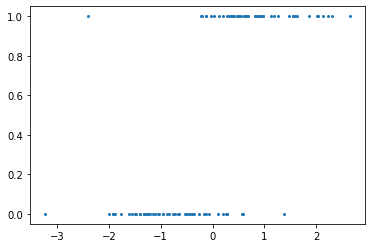

In [ ]:
# let's focus only on one feature
X_new = X[:,1]
plt.scatter(X_new, y, s=4) 
plt.show()

In [ ]:
# auxiliary functions
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))

def predict(x, b, w):
  z = x * w + b
  return z, sigmoid(z)

In [ ]:
# training routine
def fit(X, y, it, alpha):
  b = rand.random()
  w = rand.random()

  N = X.size

  for i in range(it):    
    z, y_pred = predict(X, b, w)

    dloss_db = (2/N) * sum((y_pred - y) * sigmoid_derivative(z))
    dloss_dw = (2/N) * sum((y_pred - y) * sigmoid_derivative(z) * X)

    b = b - alpha * dloss_db
    w = w - alpha * dloss_dw

  return b, w

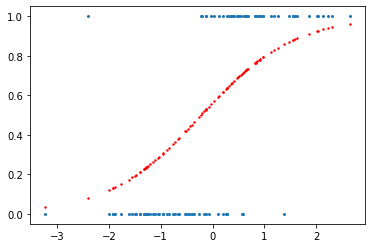

In [ ]:
# make predictions
b, w = fit(X_new, y, 100, 0.1)

y_pred = []
for i in range(X_new.size):
  x = X_new[i]
  _, pred = predict(x, b, w)
  y_pred.append(pred)

plt.scatter(X_new, y, s=4) 
plt.scatter(X_new, y_pred, color='red', s=2)
plt.show()